<a href="https://colab.research.google.com/github/balezz/modern_dl/blob/main/KerasLayers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import numpy as np
import tensorflow as tf

In [4]:
import tensorflow.keras as K

In [6]:
relu = K.activations.relu

In [18]:
X = np.arange(-10, 10, dtype=float)

relu(X, threshold=4).numpy()

array([-0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,  0.,  0.,  0.,
        0.,  0.,  5.,  6.,  7.,  8.,  9.])

In [20]:
out = K.activations.sigmoid(X)

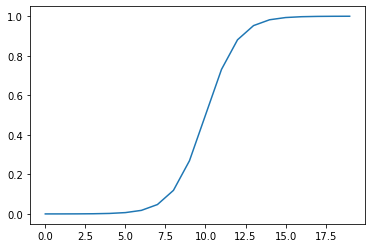

In [21]:
import matplotlib.pyplot as plt
plt.plot(out)

In [37]:
dense = K.layers.Dense(10)

In [38]:
out = dense(np.ones((1, 1000)))

(array([ 941.,  989., 1020., 1030., 1045.,  973.,  956., 1023., 1031.,
         992.]),
 array([-7.7072307e-02, -6.1660483e-02, -4.6248659e-02, -3.0836837e-02,
        -1.5425014e-02, -1.3191253e-05,  1.5398632e-02,  3.0810455e-02,
         4.6222277e-02,  6.1634101e-02,  7.7045925e-02], dtype=float32),
 <a list of 10 Patch objects>)

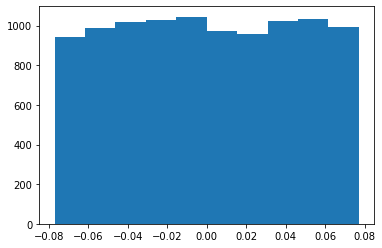

In [39]:
plt.hist(dense.get_weights()[0].ravel())

In [ ]:
K.regularizers.l1_l2()

In [66]:
input_shape = (1, 10, 3)
X = np.ones(input_shape)
conv1D = K.layers.Conv1D(filters=4, kernel_size=5, 
                         kernel_initializer=K.initializers.ones,
                         bias_initializer='zeros')

In [71]:
conv1D.weights[0].shape

TensorShape([5, 3, 4])

In [70]:
out = conv1D(X)
print(out)

tf.Tensor(
[[[15. 15. 15. 15.]
  [15. 15. 15. 15.]
  [15. 15. 15. 15.]
  [15. 15. 15. 15.]
  [15. 15. 15. 15.]
  [15. 15. 15. 15.]]], shape=(1, 6, 4), dtype=float32)


# Callbacks API

In [74]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2, ),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [84]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_train = K.utils.to_categorical(y_train, num_classes=10)
y_test = K.utils.to_categorical(y_test, num_classes=10)

In [82]:
model = K.Sequential()
model.add(K.Input(shape=(32,32,3)))
model.add(K.layers.Flatten())
model.add(K.layers.Dense(64))
model.add(K.layers.Dense(10, activation='softmax'))

optimizer=tf.keras.optimizers.Adam(learning_rate=0.8e-3)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [85]:
model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=10, callbacks=my_callbacks)

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 17.8359 - accuracy: 0.2638 - val_loss: 3.4413 - val_accuracy: 0.2865
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.2938 - accuracy: 0.3175 - val_loss: 2.0066 - val_accuracy: 0.3098
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0570 - accuracy: 0.3132 - val_loss: 2.2633 - val_accuracy: 0.2976
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.1677 - accuracy: 0.2910 - val_loss: 2.2052 - val_accuracy: 0.2858
